In [1]:
import vcf
import sys
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import numpy as np

<h2>Figure 1a</h2>

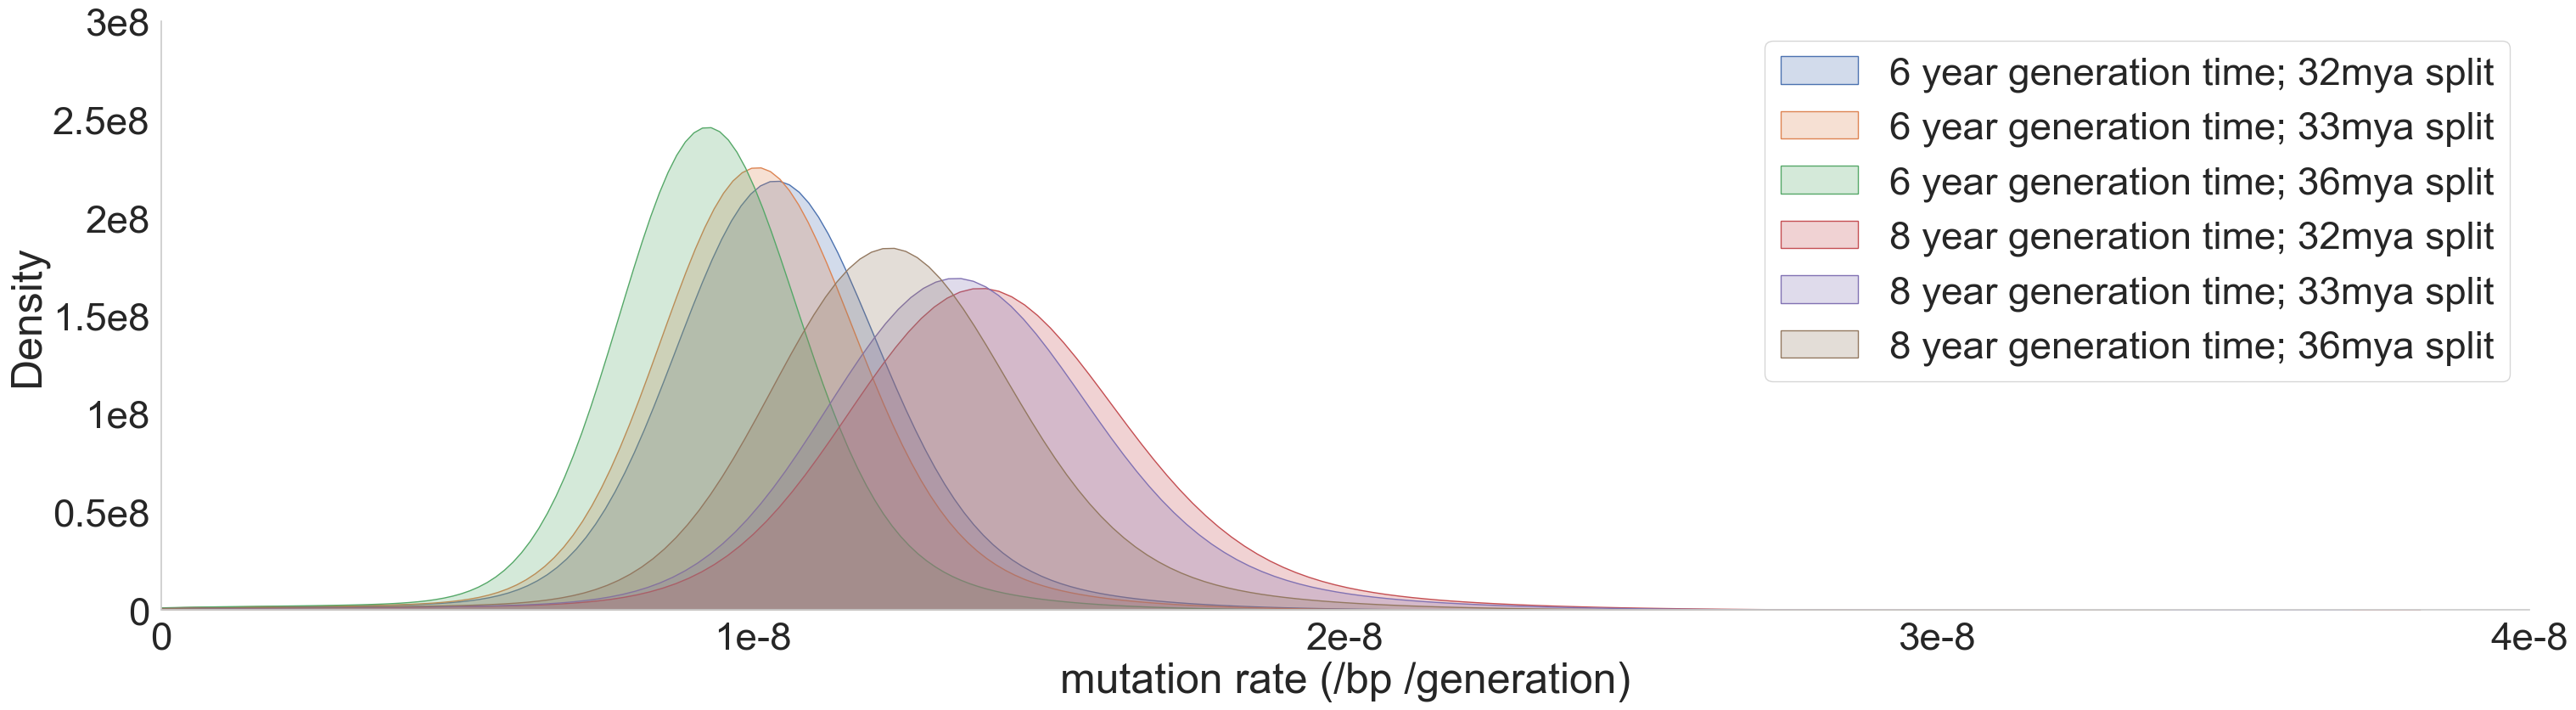

In [4]:
#Generation times
g1 = 6
g2 = 8
#Divergence times
d1 = 32000000
d2 = 33000000
d3 = 36000000
df1 = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/100kb_divergence.SNPable.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
#Subset to only those windows that meet accessibility threshold
df1 = df1[df1.length>10000]
#Calculate mutation rates
df1['mu1'] = df1.divergence / (d1/g1)
df1['mu2'] = df1.divergence / (d2/g1)
df1['mu3'] = df1.divergence / (d3/g1)
df1['mu4'] = df1.divergence / (d1/g2)
df1['mu5'] = df1.divergence / (d2/g2)
df1['mu6'] = df1.divergence / (d3/g2)
#Create density plots
sns.set(rc={'figure.figsize':(36,9),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=3)

sns.kdeplot(np.array(df1['mu1']), fill=True, bw_method=0.75, label='6 year generation time; 32mya split')
sns.kdeplot(np.array(df1['mu2']), fill=True, bw_method=0.75, label='6 year generation time; 33mya split')
sns.kdeplot(np.array(df1['mu3']), fill=True, bw_method=0.75, label='6 year generation time; 36mya split')
sns.kdeplot(np.array(df1['mu4']), fill=True, bw_method=0.75, label='8 year generation time; 32mya split')
sns.kdeplot(np.array(df1['mu5']), fill=True, bw_method=0.75, label='8 year generation time; 33mya split')
sns.kdeplot(np.array(df1['mu6']), fill=True, bw_method=0.75, label='8 year generation time; 36mya split')

plt.xlabel('mutation rate (/bp /generation)')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlim([0,4e-8])
plt.ylim([0,2.75e8])
plt.xticks([0, 1e-8, 2e-8, 3e-8, 4e-8], ['0', '1e-8', '2e-8', '3e-8', '4e-8'])
plt.yticks([0, 0.5e8, 1e8, 1.5e8, 2e8, 2.5e8, 3e8], ['0', '0.5e8', '1e8', '1.5e8', '2e8', '2.5e8', '3e8'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.title('100kb window size')

<h2>Figure 1b</h2>

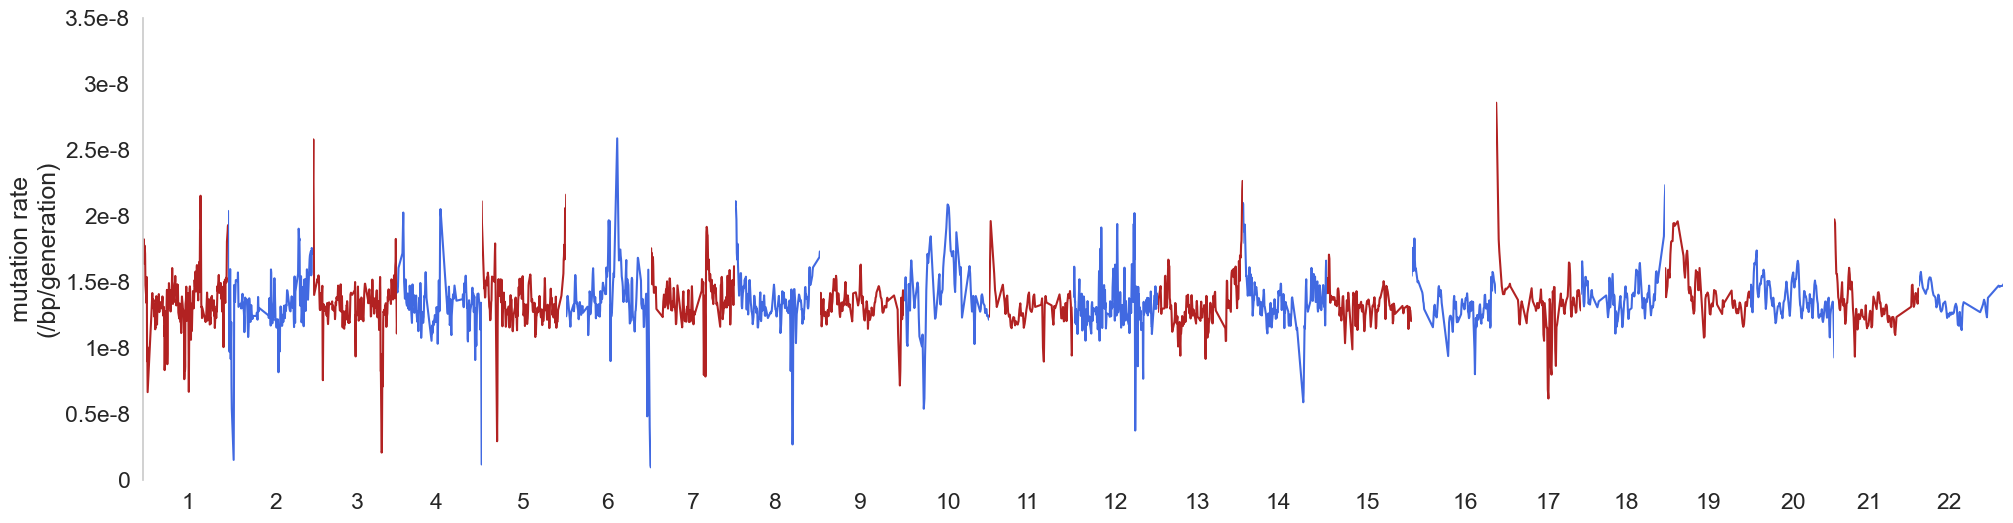

In [5]:
#Generation times
g1 = 6
g2 = 8
#Divergence times
d1 = 32000000
d2 = 33000000
d3 = 36000000
df1 = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/1mb_divergence.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df1 = df1[df1.length>100000]
df1['mu'] = df1.divergence / (d2/g2)

sns.set(rc={'figure.figsize':(24,6),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)
scaffolds = [x for x in range(15,37)] 
fig, axes = plt.subplots(1,22)
for c, ax in enumerate(axes.flat):
    tdf = df1[df1.chrom=='CM0808'+str(scaffolds[c]) + '.1']
    if(c%2):
        col='royalblue'
    else:
        col='firebrick'
    ax.plot(tdf.start, tdf.mu, c=col)
    ax.set_ylim([0,3.5e-8])
    ax.set_xticks([tdf.start.quantile(0.5)])
    ax.set_xticklabels([str(scaffolds[c]-14)])

    if(scaffolds[c] != 1):
        ax.set_yticklabels('')
    ax.margins(0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if(scaffolds[c]!=15):
        ax.spines['left'].set_visible(False)
        ax.set_yticks([0, 0.5e-8, 1e-8, 1.5e-8, 2e-8, 2.5e-8, 3e-8, 3.5e-8])
        ax.set_yticklabels(['', '', '', '', '', '','',''])
    else:
        ax.set_yticks([0, 0.5e-8, 1e-8, 1.5e-8, 2e-8, 2.5e-8, 3e-8, 3.5e-8])
        ax.set_yticklabels(['0', '0.5e-8', '1e-8', '1.5e-8', '2e-8', '2.5e-8', '3e-8', '3.5e-8'])
        ax.set_ylabel('mutation rate\n(/bp/generation)')

plt.subplots_adjust(wspace=0, hspace=0)

<h2>Generate supplementary table S2</h2>

In [2]:
#Generation times
g1 = 6
g2 = 8
#Divergence times
d1 = 32000000
d2 = 33000000
d3 = 36000000
res = []
#Accessibility thresholds
thresholds = [1, 10, 100, 1000]
names = ['1mb', '100kb', '10kb', '1kb']
#Loop through window sizes
for i in range(0, 4):
    df1 = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/"+names[i]+"_divergence.SNPable.bed", sep='\t', 
                 names=['chrom','start','end','length','point_muts', 'divergence'])
    #Count number of windows with atleast one accessible sites
    total = len(df1[df1.length>=1])
    #Generate accessibility thresholds for current window size
    current_thresholds = [int(x/thresholds[i]) for x in [10000, 25000, 50000, 75000, 100000, 250000]]
    #Loop through thresholds
    for j in current_thresholds:
        df1 = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/"+names[i]+"_divergence.SNPable.bed", sep='\t', 
             names=['chrom','start','end','length','point_muts', 'divergence'])
        #Keep only windows that meet threshold
        df1 = df1[df1.length>=j]
        #Calculate mutation rates
        df1['mu1'] = df1.divergence / (d1/g1)
        df1['mu2'] = df1.divergence / (d2/g1)
        df1['mu3'] = df1.divergence / (d3/g1)
        df1['mu4'] = df1.divergence / (d1/g2)
        df1['mu5'] = df1.divergence / (d2/g2)
        df1['mu6'] = df1.divergence / (d3/g2)
        
        lst=[j, len(df1), float(len(df1)/total), df1['mu1'].mean(), df1['mu2'].mean(), df1['mu3'].mean(), df1['mu4'].mean(), df1['mu5'].mean(), df1['mu6'].mean()]
        res.append(lst)

pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8
0,10000,4295,0.856602,1.051179e-08,1.019325e-08,9.343814e-09,1.401572e-08,1.359100e-08,1.245842e-08
1,25000,4163,0.830275,1.049258e-08,1.017462e-08,9.326739e-09,1.399011e-08,1.356617e-08,1.243565e-08
2,50000,3975,0.792780,1.047878e-08,1.016124e-08,9.314472e-09,1.397171e-08,1.354832e-08,1.241930e-08
3,75000,3741,0.746111,1.048767e-08,1.016986e-08,9.322373e-09,1.398356e-08,1.355982e-08,1.242983e-08
4,100000,3428,0.683686,1.050247e-08,1.018421e-08,9.335530e-09,1.400329e-08,1.357895e-08,1.244737e-08
5,250000,1589,0.316913,1.064350e-08,1.032097e-08,9.460892e-09,1.419134e-08,1.376130e-08,1.261452e-08
6,1000,37164,0.923077,1.045092e-08,1.013423e-08,9.289708e-09,1.393456e-08,1.351230e-08,1.238628e-08
7,2500,35493,0.881573,1.043965e-08,1.012330e-08,9.279692e-09,1.391954e-08,1.349773e-08,1.237292e-08
8,5000,33155,0.823502,1.045297e-08,1.013621e-08,9.291527e-09,1.393729e-08,1.351495e-08,1.238870e-08
9,7500,30968,0.769181,1.047939e-08,1.016183e-08,9.315015e-09,1.397252e-08,1.354911e-08,1.242002e-08


<h2>Supplementary Figure S1</h2>

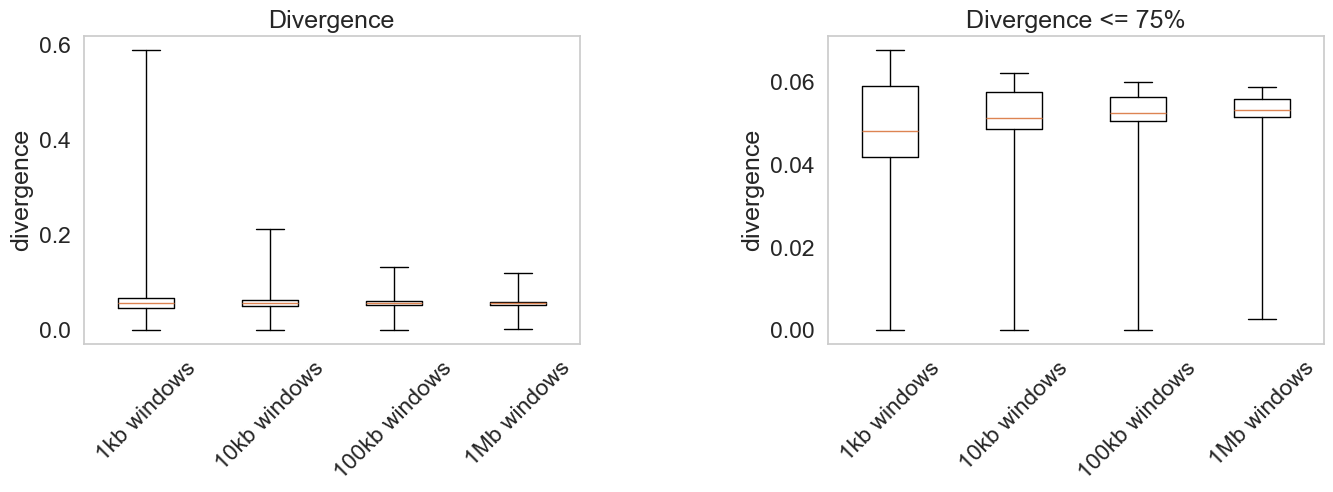

In [3]:
df = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/1kb_divergence.SNPable.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df = df[df.length>100]
dmad_demog1 = list(df.divergence)
df = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/10kb_divergence.SNPable.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df = df[df.length>1000]
dmad_demog2 = list(df.divergence)
df = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/100kb_divergence.SNPable.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df = df[df.length>10000]
dmad_demog3 = list(df.divergence)
df = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/1mb_divergence.SNPable.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df = df[df.length>100000]
dmad_demog4 = list(df.divergence)


df = pd.DataFrame([dmad_demog1, dmad_demog2, dmad_demog3, dmad_demog4]).T
rdf = df.describe()

labels = ["1kb windows", "10kb windows", "100kb windows", "1Mb windows"]

bxp_stats = rdf.apply(lambda x: {'med':x['mean'], 'q1':x['25%'], 'q3':x['75%'], 'whislo':x['min'], 'whishi':x['max']}, axis=0).tolist()

# add the column names as labels to each dictionary entry
for index, item in enumerate(bxp_stats):
    item.update({'label':labels[index]})

sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax.bxp(bxp_stats, showfliers=False)
ax.set_ylabel("divergence")
ax.set_title("Divergence")
ax.tick_params(axis='x', rotation=45)

df = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/1kb_divergence.SNPable.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df = df[df.length>100]
df = df[df.divergence<=df.divergence.quantile(0.75)]
dmad_demog1 = list(df.divergence)
df = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/10kb_divergence.SNPable.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df = df[df.length>1000]
df = df[df.divergence<=df.divergence.quantile(0.75)]
dmad_demog2 = list(df.divergence)
df = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/100kb_divergence.SNPable.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df = df[df.length>10000]
df = df[df.divergence<=df.divergence.quantile(0.75)]
dmad_demog3 = list(df.divergence)
df = pd.read_csv(r"/Volumes/WD/titi/mu/halSnps/1mb_divergence.SNPable.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df = df[df.length>100000]
df = df[df.divergence<=df.divergence.quantile(0.75)]
dmad_demog4 = list(df.divergence)

df = pd.DataFrame([dmad_demog1, dmad_demog2, dmad_demog3, dmad_demog4]).T
rdf = df.describe()

labels = ["1kb windows", "10kb windows", "100kb windows", "1Mb windows"]

bxp_stats = rdf.apply(lambda x: {'med':x['mean'], 'q1':x['25%'], 'q3':x['75%'], 'whislo':x['min'], 'whishi':x['max']}, axis=0).tolist()

# add the column names as labels to each dictionary entry
for index, item in enumerate(bxp_stats):
    item.update({'label':labels[index]})

ax2.bxp(bxp_stats, showfliers=False)
ax2.set_ylabel("divergence")
ax2.set_title("Divergence <= 75%")
ax2.tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.5, hspace=0)